In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from bootstrap import ar1_bstr, ema_bstr, kf_bstr, svm_bstr, get_Y
#from bootstrap import pp_bstr
import import_ipynb
from FB1_EMA_Bootstrap import ema_bootstrap
from FB2_MACD_bootstrap import bootstrap
from FB3_SVM_bootstrap import svm_bstr
from FB4_Autoregression_Bootstrap import AR_bootstrap
# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

importing Jupyter notebook from FB1_EMA_Bootstrap.ipynb
(671,)
(420,)
importing Jupyter notebook from FB2_MACD_bootstrap.ipynb
importing Jupyter notebook from FB3_SVM_bootstrap.ipynb
importing Jupyter notebook from FB4_Autoregression_Bootstrap.ipynb
0.794746040617508


In [2]:
facebook = pd.read_excel('fb.xlsx')
facebook.set_index('Date')
facebook['OpenTmr'] = facebook['Open '].shift(-1)
facebook['CloseTmr'] = facebook['Close '].shift(-1)
facebook['OpenClose']= (facebook['Open ']+ facebook['Close '])/2
facebook['HighLow'] = (facebook['High ']+ facebook['Low '])/2
facebook['OCHL'] = (facebook['Open ']+ facebook['Close ']+facebook['High ']+ facebook['Low '])/4
facebook['CloseYest'] = facebook['Close '].shift(-1)
facebook['Close2dayBefore'] = facebook['Close '].shift(-2)
#facebook.head()
facebook=facebook.set_index('Date')
facebook.index = facebook.index.map(lambda x: x.strftime('%Y-%m-%d'))
facebook = facebook.dropna(0)
facebook.tail()

Open    High     Low   Close   Volume  OpenTmr  CloseTmr  \
2018-08-22  172.07  174.24  171.88  173.69  145063   173.90    173.00   
2018-08-23  173.90  175.55  172.26  173.00  158429   173.00    174.66   
2018-08-24  173.00  174.82  172.92  174.66  121229   175.50    177.90   
2018-08-27  175.50  178.67  175.05  177.90  155019   177.90    176.50   
2018-08-28  177.90  178.58  175.83  176.50  133683   176.67    175.74   

            OpenClose  HighLow      OCHL  CloseYest  Close2dayBefore  
2018-08-22     172.88  173.060  172.9700     173.00           174.66  
2018-08-23     173.45  173.905  173.6775     174.66           177.90  
2018-08-24     173.83  173.870  173.8500     177.90           176.50  
2018-08-27     176.70  176.860  176.7800     176.50           175.74  
2018-08-28     177.20  177.205  177.2025     175.74           177.65

In [3]:
N = facebook.shape[0] 
num_boot = 300 # total num bootstrap
T= 250 # start day
window = 200 # training period window
Y =facebook['OpenTmr'][-(N-(T+1)):].values
Y_close = facebook['CloseTmr'][-(N-(T+1)):].values

In [4]:
facebook.corr()

Open      High       Low     Close     Volume   OpenTmr  \
Open             1.000000  0.998388  0.995776  0.995301 -0.198106  0.995791   
High             0.998388  1.000000  0.994353  0.996613 -0.177346  0.997115   
Low              0.995776  0.994353  1.000000  0.997909 -0.242670  0.997425   
Close            0.995301  0.996613  0.997909  1.000000 -0.214947  0.999638   
Volume          -0.198106 -0.177346 -0.242670 -0.214947  1.000000 -0.212781   
OpenTmr          0.995791  0.997115  0.997425  0.999638 -0.212781  1.000000   
CloseTmr         0.991307  0.992681  0.993386  0.995306 -0.222941  0.995295   
OpenClose        0.998827  0.998675  0.998014  0.998822 -0.206761  0.998886   
HighLow          0.998507  0.998619  0.998555  0.998664 -0.209933  0.998679   
OCHL             0.998727  0.998707  0.998344  0.998803 -0.208358  0.998842   
CloseYest        0.991307  0.992681  0.993386  0.995306 -0.222941  0.995295   
Close2dayBefore  0.987495  0.988589  0.990079  0.991283 -0.228303  0.991292   

                 CloseTmr  OpenClose   HighLow      OCHL  CloseYest  \
Open             0.991307   0.998827  0.998507  0.998727   0.991307   
High             0.992681   0.998675  0.998619  0.998707   0.992681   
Low              0.993386   0.998014  0.998555  0.998344   0.993386   
Close            0.995306   0.998822  0.998664  0.998803   0.995306   
Volume          -0.222941  -0.206761 -0.209933 -0.208358  -0.222941   
OpenTmr          0.995295   0.998886  0.998679  0.998842   0.995295   
CloseTmr         1.000000   0.994474  0.994434  0.994513   1.000000   
OpenClose        0.994474   1.000000  0.999761  0.999940   0.994474   
HighLow          0.994434   0.999761  1.000000  0.999940   0.994434   
OCHL             0.994513   0.999940  0.999940  1.000000   0.994513   
CloseYest        1.000000   0.994474  0.994434  0.994513   1.000000   
Close2dayBefore  0.995293   0.990551  0.990725  0.990697   0.995293   

                 Close2dayBefore  
Open                    0.987495  
High                    0.988589  
Low                     0.990079  
Close                   0.991283  
Volume                 -0.228303  
OpenTmr                 0.991292  
CloseTmr                0.995293  
OpenClose               0.990551  
HighLow                 0.990725  
OCHL                    0.990697  
CloseYest               0.995293  
Close2dayBefore         1.000000

([<matplotlib.axis.YTick at 0x1d6511c6518>,
 <a list of 12 Text yticklabel objects>)

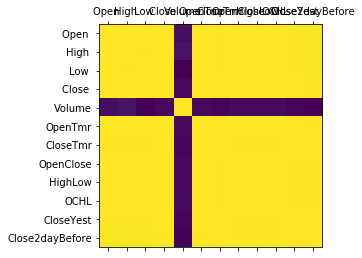

In [5]:
import seaborn as sns
plt.matshow(facebook.corr())
plt.xticks(range(len(facebook.columns)),facebook.columns)
plt.yticks(range(len(facebook.columns)),facebook.columns)

In [6]:

yhat_ar1, rmse_ar1 = AR_bootstrap()    
yhat_ema, rmse_ema = ema_bootstrap()
#yhat_pp, rmse_pp = pp_bstr()  # too slow 
yhat_macd, rmse_macd = bootstrap()
#num_boot = 1
yhat_svm, rmse_svm = svm_bstr()
    
print("AR_RMSE: ", rmse_ar1)
print("EMA_RMSE: ", rmse_ema)
print("MACD_RMSE: ", rmse_macd)
#print("kf_RMSE: ", rmse_kf)
print("SVM_RMSE: ", rmse_svm)

AR_RMSE:  0.794746040617508
EMA_RMSE:  3.852846961505884
MACD_RMSE:  3.9370962624783075
SVM_RMSE:  5.245405565453984


In [7]:
def random_forest():
    "random forest voting"
    T=Y.shape[0]-1
    print(T)
    Y_rf = np.zeros(T)
    for t in range(0, T):
        if min(abs(yhat_ema[t]-Y[t]),abs(yhat_macd[t]-Y[t]),abs(yhat_ar1[t]-Y[t]),
               abs(yhat_svm[t]-Y[t]))==abs(yhat_ema[t]-Y[t]):
            Y_rf[t] = yhat_ema[t]
        elif min(abs(yhat_ema[t]-Y[t]),abs(yhat_macd[t]-Y[t]),abs(yhat_ar1[t]-Y[t]),
                 abs(yhat_svm[t]-Y[t]))==abs(yhat_macd[t]-Y[t]):
            Y_rf[t] = yhat_macd[t]
        elif min(abs(yhat_macd[t]-Y[t]),abs(yhat_ema[t]-Y[t]),abs(yhat_svm[t]-Y[t]),
                 abs(yhat_ar1[t]-Y[t]))==abs(yhat_ar1[t]-Y[t]):
            Y_rf[t] = yhat_ar1[t]          
        else:
            Y_rf[t] = yhat_svm[t]  
    
    rmse_rf=np.sqrt(np.mean((Y[:-1]-Y_rf)**2))
    print("random forest rmse: ", rmse_rf)
    return Y, Y_rf, Y_close

In [8]:
Y, Y_rf, Y_close = random_forest()

417
random forest rmse:  0.7322632454715847


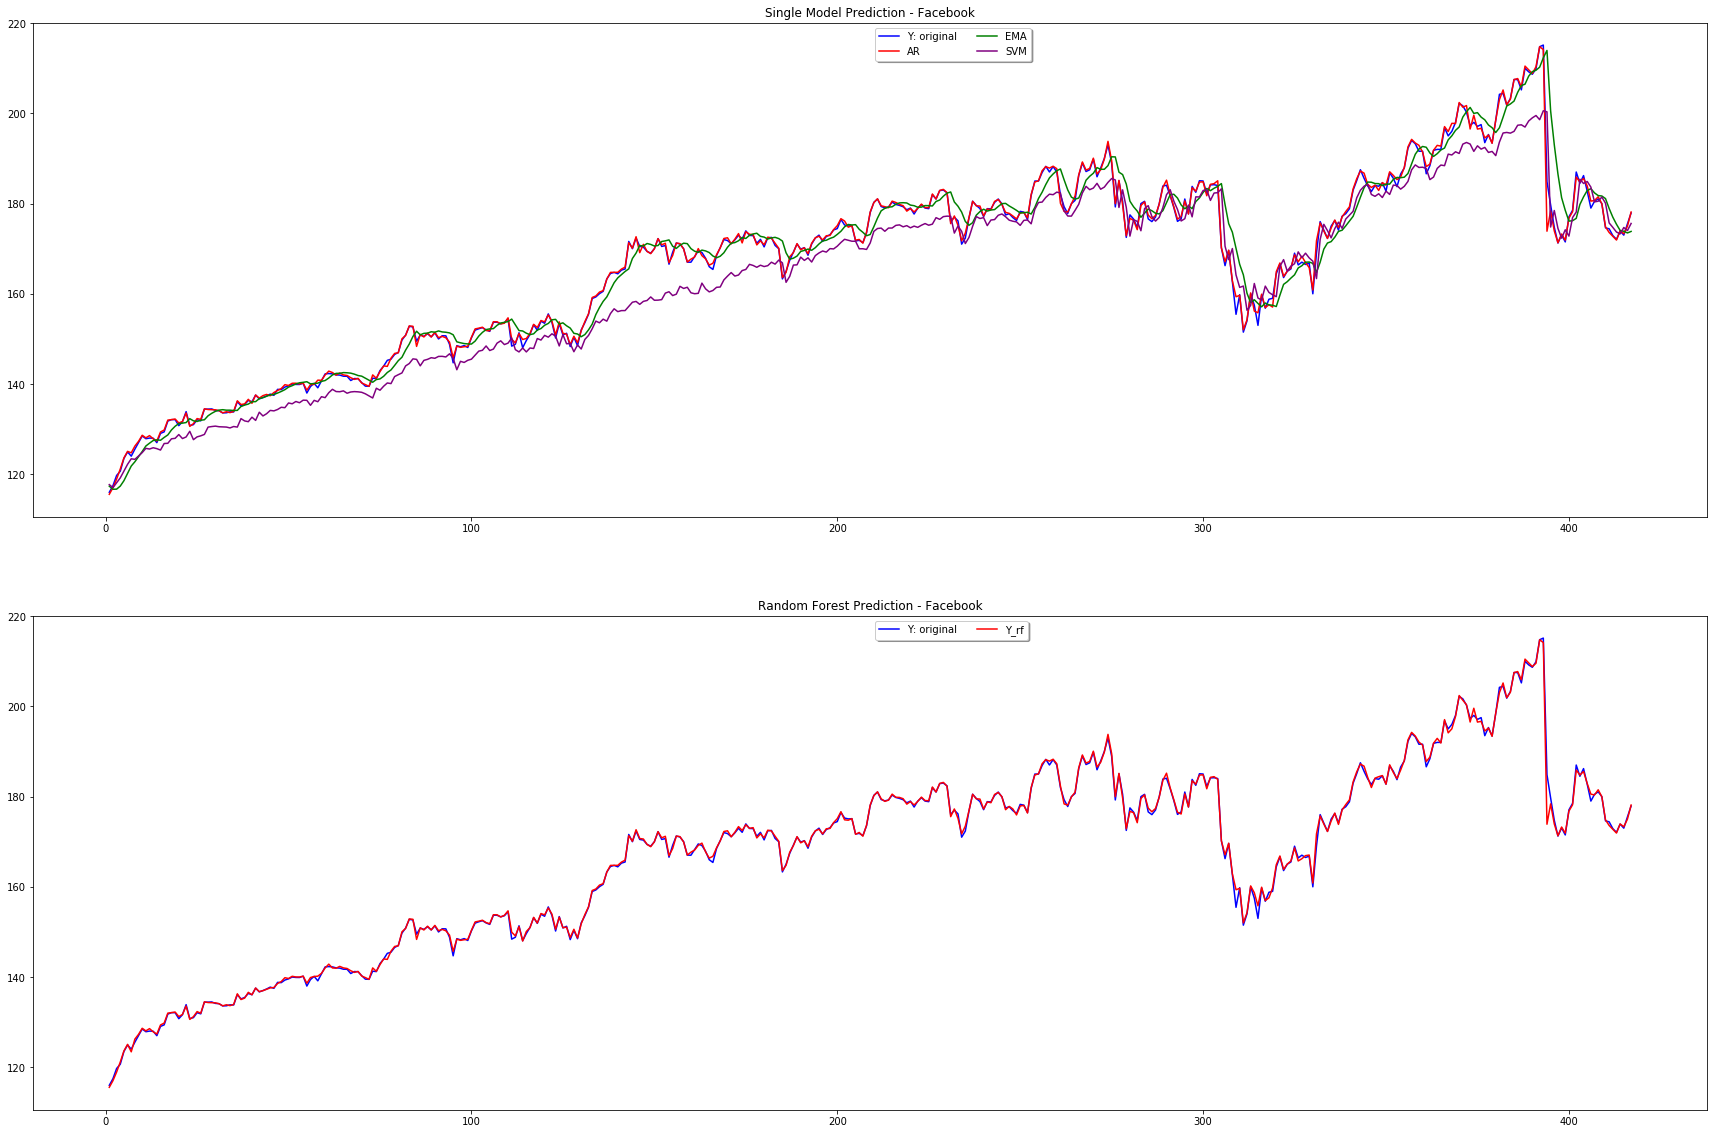

In [9]:
timevec = np.linspace(1,417,417)
plt.figure(figsize=(30,20))
ax = plt.subplot(211)
ax.plot(timevec, Y[:-1], 'blue', label = "Y: original")
ax.plot(timevec, yhat_ar1[:-1], 'red', label = "AR")
ax.plot(timevec, yhat_ema[:-3], 'green', label = "EMA")
ax.plot(timevec, yhat_svm[:-3], 'purple', label = "SVM")
plt.title('Single Model Prediction - Facebook')
ax.legend(loc=2, bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
ax = plt.subplot(212)
ax.plot(timevec, Y[:-1], 'blue', label = "Y: original")
ax.plot(timevec, Y_rf, 'red', label = "Y_rf")
plt.title('Random Forest Prediction - Facebook')
ax.legend(loc=2, bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.show()

In [10]:
facebook.tail()

Open    High     Low   Close   Volume  OpenTmr  CloseTmr  \
2018-08-22  172.07  174.24  171.88  173.69  145063   173.90    173.00   
2018-08-23  173.90  175.55  172.26  173.00  158429   173.00    174.66   
2018-08-24  173.00  174.82  172.92  174.66  121229   175.50    177.90   
2018-08-27  175.50  178.67  175.05  177.90  155019   177.90    176.50   
2018-08-28  177.90  178.58  175.83  176.50  133683   176.67    175.74   

            OpenClose  HighLow      OCHL  CloseYest  Close2dayBefore  
2018-08-22     172.88  173.060  172.9700     173.00           174.66  
2018-08-23     173.45  173.905  173.6775     174.66           177.90  
2018-08-24     173.83  173.870  173.8500     177.90           176.50  
2018-08-27     176.70  176.860  176.7800     176.50           175.74  
2018-08-28     177.20  177.205  177.2025     175.74           177.65